# Libraries

In [2]:
import pandas as pd 

import numpy as np

from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data


In [3]:
geo_0 = pd.read_csv('/Users/ericross/Desktop/DataSets/geo_data_0.csv')

In [4]:
geo_1 = pd.read_csv('/Users/ericross/Desktop/DataSets/geo_data_1.csv')

In [5]:
geo_2 = pd.read_csv('/Users/ericross/Desktop/DataSets/geo_data_2.csv')

## Data Overveiw

### Region 0

In [6]:
geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [8]:
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Region 1

In [9]:
geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


### Region 2

In [11]:
geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [13]:
geo_0['product']

0        105.280062
1         73.037750
2         85.265647
3        168.620776
4        154.036647
            ...    
99995    110.744026
99996    122.346843
99997     64.375443
99998     74.040764
99999    149.633246
Name: product, Length: 100000, dtype: float64

### Charting Production Values

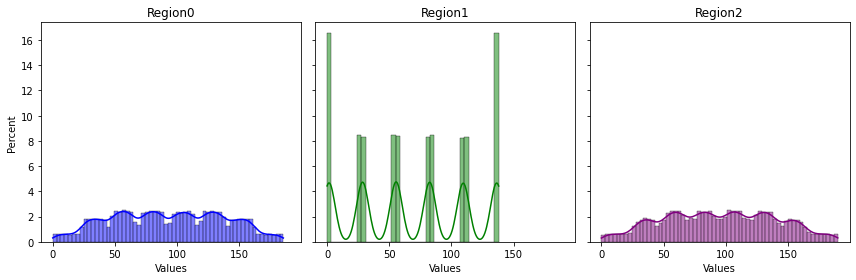

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)

sns.histplot(geo_0['product'], kde=True, stat='percent', ax=axes[0], color='blue')
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Percent")
axes[0].set_title("Region0")

sns.histplot(geo_1['product'], kde=True, stat='percent', ax=axes[1], color='green')
axes[1].set_xlabel("Values")
axes[1].set_title("Region1")

sns.histplot(geo_2['product'], kde=True, stat='percent', ax=axes[2], color='purple')
axes[2].set_xlabel("Values")
axes[2].set_title("Region2")

plt.tight_layout()
plt.show()

# MODELING

### Region0

#### Train, Valid, Test 

In [15]:
# splitting the data
target0 = geo_0['product']
features0 = geo_0.drop(['product','id'], axis=1)

features0_train , features0_valid , target0_train , target0_valid = train_test_split(features0, target0, test_size=0.25, random_state=24680) 


#### Scaling Features

In [16]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
numeric = ['f0','f1','f2']
scaler.fit(features0_train[numeric])
features0_train[numeric] = scaler.transform(features0_train[numeric])
features0_valid[numeric] = scaler.transform(features0_valid[numeric])

In [17]:
print(features0_train)

             f0        f1        f2
6993   1.805649 -0.343927 -0.897550
463   -0.483896  1.483733  2.060324
97311 -1.687365 -0.113726 -0.935542
94739  0.790568  0.191974  0.231956
53814 -0.045251 -0.958302 -0.358488
...         ...       ...       ...
60797  0.261456 -1.337666 -0.013949
80482  0.045546 -1.239935  0.635566
82731 -0.721466  1.609175  0.160910
2211   1.547325 -0.845656 -1.189972
73830  0.887899 -1.285161  0.679962

[75000 rows x 3 columns]


#### Modeling

In [18]:
model0 = LinearRegression()

model0.fit(features0_train, target0_train)
    
predictions0_valid = pd.Series(model0.predict(features0_valid))

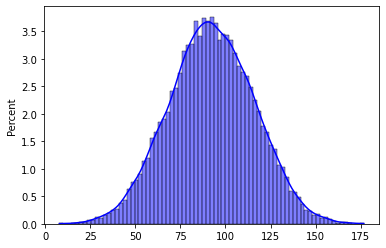

In [19]:
sns.histplot(predictions0_valid, kde=True, stat='percent', color='blue')

plt.show()

#### RSME

In [20]:
# MSE & RMSE Calculations. 
mse = mean_squared_error(target0_valid, predictions0_valid)

print(' REGION 0')

print('MSE :', mse)
print('RMSE :', mse ** 0.5)
print('Range: ', target0_valid.min(),'-',target0_valid.max())

 REGION 0
MSE : 1430.6394569737404
RMSE : 37.82379485157115
Range:  0.0 - 185.33735241894465


Model_0
- RSME is slightly high but acceptable. 

### Region1

####  Train, Valid, Test

In [21]:
target1 = geo_1['product']
features1 = geo_1.drop(['product','id'], axis=1)

features1_train , features1_valid , target1_train , target1_valid = train_test_split(features1, target1, test_size=0.25, random_state=24680) 


#### Scaling Features

In [22]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
numeric = ['f0','f1','f2']
scaler.fit(features1_train[numeric])
features1_train[numeric] = scaler.transform(features1_train[numeric])
features1_valid[numeric] = scaler.transform(features1_valid[numeric])

#### Modeling

In [23]:
model1 = LinearRegression().fit(features1_train, target1_train)

predictions1_valid = model1.predict(features1_valid)


<AxesSubplot:ylabel='Percent'>

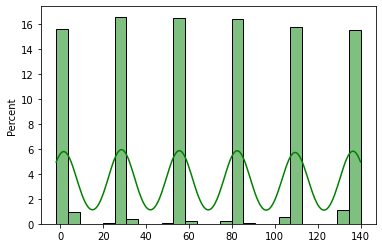

In [24]:
sns.histplot(predictions1_valid, kde=True, stat='percent', color='green')

#### RSME

In [25]:
# MSE & RMSE Calculations. 
mse = mean_squared_error(target1_valid, predictions1_valid)

print(' REGION 1')
print('MSE :', mse)
print('RMSE :', mse ** 0.5)
print('Range: ', target1_valid.min(),'-',target1_valid.max())

 REGION 1
MSE : 0.7860353061240081
RMSE : 0.8865863218683266
Range:  0.0 - 137.94540774090564


##### **1**: RSME-Conclusion

**Model_1** is *highly accurate*.
- RSME = 0.8865863218683268
    - Range: 0.0 - 137.94540774090564

### Region2

####  Train, Valid, Test

In [26]:
# splitting into training and valid sets
target2 = geo_2['product']
features2 = geo_2.drop(['product','id'], axis=1)

features2_train , features2_valid , target2_train , target2_valid = train_test_split(features2, target2, test_size=0.25, random_state=24680) 

#### Scaling Features

In [27]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
numeric = ['f0','f1','f2']
scaler.fit(features2_train[numeric])
features2_train[numeric] = scaler.transform(features2_train[numeric])
features2_valid[numeric] = scaler.transform(features2_valid[numeric])
print(features2_valid)

             f0        f1        f2
34500 -1.670884  0.371059 -0.188689
99956  1.012227 -0.217961  0.688449
68245 -0.203523 -0.154578  0.779782
57944  2.179312  1.130733 -0.775089
51495 -0.553404  0.228251  0.278922
...         ...       ...       ...
28470  0.158579  0.441319 -1.600973
47951  0.614497 -0.134498 -0.974397
72225  1.160359  0.703654  0.123623
37887  1.208450  0.101411  0.218045
35183  0.046360  0.056656  2.148106

[25000 rows x 3 columns]


#### Modeling

In [28]:
model2 = LinearRegression().fit(features2_train, target2_train)

predictions2_valid = model2.predict(features2_valid)

<AxesSubplot:ylabel='Percent'>

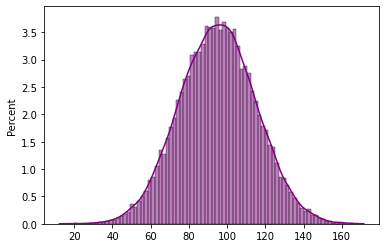

In [29]:
sns.histplot(predictions2_valid, kde=True, stat='percent', color='purple')

#### RSME

In [30]:
# MSE & RMSE Calculations. 
mse = mean_squared_error(target2_valid, predictions2_valid)

print('   REGION_2')
print('MSE :', mse)
print('RMSE :', mse ** 0.5)
print('Range: ', target2_valid.min(),'-',target2_valid.max())

   REGION_2
MSE : 1616.6292401462572
RMSE : 40.20732818960067
Range:  0.0046060000398026 - 189.98819123328263


##### **2**: RSME-Conclusion
**Model_2**
- RMSE : 39.958042459521614
- Range : 0.0 - 189.9964616709258

# PROFIT CALCULATIONS

In [31]:
# saving metrics for production

cost=100000000 
quantity= 200
perwell_cost = int(cost/quantity)
unit_price = 4500
breakeven_product = perwell_cost / unit_price

print('Single Well Breakeven Points.')
print(f'Avg. Volume:~{breakeven_product:0.0f}')
print('Cost:',perwell_cost,'(USD)')

Single Well Breakeven Points.
Avg. Volume:~111
Cost: 500000 (USD)


### Top_200_profits

In [32]:
def profit(selected):
        revenue = selected * 4500
        profit = revenue - 500000
        return profit

In [33]:
def top_200_profit(target, predictions, count):
    predictions = np.array(predictions)
    pred_sorted = np.argsort(predictions)[::-1]
    target = np.array(target)
    selected = target[pred_sorted][:count]
    return pd.Series(profit(selected)).sum()

In [34]:
#profit for individual wells in region 0

profits0 = top_200_profit(target0_valid, predictions0_valid, 200)
#-------------------------^^^^^^^^^^^^^-------------------------
profits0_total = profits0.sum()

print(f'Profits-Region0:{profits0:.4f}')

Profits-Region0:30959797.7115


In [35]:
#profit for individual wells in region 1

profits1 = top_200_profit(target1_valid, predictions1_valid, 200)
profits1_total = profits1.sum()

print(f'Profit-Region1:{profits1:.4f}')

Profit-Region1:24150866.9668


In [36]:
#profit for individual wells in region 2

profits2 = top_200_profit(target2_valid, predictions2_valid, 200)
profits2_total = profits2.sum()

print(f'Profit-Region2:{profits2:.4f}')

Profit-Region2:26469034.9081


#### Conclusion.  

**Region0**
- Total of Top 200 Profit: 30959797.71145364

**Region1**
- Total of Top 200 Profit: 24150866.96681509

**region2**
- Total of Top 200 Profit: 26469034.90806426


Based on Predictions on the top 200 wells from each region and calculating the total profits.
- **Region 2** is the only region that shows having a total profit that is not negative. Based on this could be an argument for developing in this region if all possible sites are excavated. This does not mean that wells will have suffecient volume to be profitable only that the region as a whole is in the green based on predictions.

# Bootstrap Sampling

In [37]:
def bootstrap_sample(target_boot, prediction_boot):

    values_profit=[]
    neg_well = 0 
    
    prediction_boot = pd.Series(prediction_boot)
    
    prediction_boot.reset_index(drop=True, inplace=True)
    target_boot.reset_index(drop=True, inplace=True)
    
    for i in range(1000):
        #1000 samples for volume from target
        target_subsample = target_boot.sample(500, replace=True)
       
        prediction_subsample = prediction_boot[target_subsample.index]
        
        #adding "top_200_profit" values of each subsample 
        values_profit.append(top_200_profit(target_subsample, prediction_subsample, 200))
        # mean
    mean = np.mean(values_profit)
        # confidence intervals
    ci = np.percentile(values_profit, [2.5, 97.5]) 
    #risk calculation. 
    for i in values_profit:
        if i < 0: 
            neg_well += 1
    risk_of_loses = (neg_well / len(values_profit))*100   
    return mean, ci, risk_of_loses

In [38]:
#region0
mean_profit0, ci0, risk0 = bootstrap_sample(target0_valid, predictions0_valid)
#region1
mean_profit1, ci1, risk1= bootstrap_sample(target1_valid, predictions1_valid)
#region2
mean_profit2, ci2, risk2 = bootstrap_sample(target2_valid, predictions2_valid)

In [39]:
print('Region 0')

print(f'Avg. Profit: {mean_profit0}')
print(f'Con. Interval: {ci0}')
print(f'Risk of Loses: {risk0}%')

Region 0
Avg. Profit: 4430813.562489239
Con. Interval: [-753106.34727295 9708203.70470916]
Risk of Loses: 5.2%


In [40]:
print('Region 1')

print(f'Avg. Profit: {mean_profit1:0.5f}')
print(f'Con. Interval: {ci1}')
print(f'Risk of Losses: {risk1}%')

Region 1
Avg. Profit: 4440210.07241
Con. Interval: [ 453010.43602593 8139836.86620788]
Risk of Losses: 1.0999999999999999%


In [41]:
print('Region 2')

print(f'Avg. Profit: {mean_profit2:0.5f}')
print(f'Con. Interval: {ci2}')
print(f'Risk of Loses: {risk2}%')

Region 2
Avg. Profit: 3812667.33049
Con. Interval: [-1661308.28110109  8940204.82552793]
Risk of Loses: 6.9%


### Conclusion - Bootstrapping

Region0

- Avg. Profit: 4,528,813.831334356 (usd)
- 95% Con. Interval:(-730,255.07550901, 9,360,096.4714741)
- Risk of Loses: ~5.0%

Region1

- Avg. Profit: 4,573,837.08396 (usd)
- 95% Con. Interval:(353,117.5039875, 8,472,777.02309997)
- Risk of Loses: ~1.5%

Region2

- Avg. Profit: 3,963,091.13861 (usd)
- 95% Con. Interval: (-1,078,291.42607806, 9,348,153.66291823)
- Risk of Loses: ~7.3%

**Conclusion**

After analyzing the result of the samples for each region*
The only one of the regions resulted in a *risk of lose* lower than the target (2.5%) is **Region 1**. 
- **region1** has a *risk of lose* of **~1.5%**. 
- lower boundry of the confidence interval was positive, also the only region that has this feature. 

Other regions (risk of lose-%).

- region0:(~ 5.0%).
- region2:(~ 7.3%). 

# Final Conclusions

### RSME - Conclusion

**Model_0** 

- MSE : 1430.6394569737404
- RMSE : 37.82379485157115
- Range:  0.0 - 185.33735241894465
   
**Model_1** 

- MSE : 0.7860353061240083
- RMSE : 0.8865863218683268
- Range:  0.0 - 137.94540774090564   
    
**Model_2** 

- MSE : 1616.6292401462572
- RMSE : 40.20732818960067
- Range:  0.0046060000398026 - 189.98819123328263

**Ranking**
- 1st - **Model_1** - RSME : 0.8865863218683268
- 2nd - **Model_0** - RMSE : 37.82379485157115   
- 3rd - **Model_2** - RMSE : 40.20732818960067

**Recommendation** 

- Based on the "RSME metric" the model with the *lowest chance of error* would be **Model_1** being ~1.5%.

### Top 200 Profit Calc. - Conclusion

**top_200_profit:** one random sample of 500.

Based on predictions on the top 200 wells from each region and calculating the total profits.
- **Region0** has the highest predicted total profit (~30,959,798). 

**Region0**
- 30,959,797.71145364

**Region1** 
- 24,150,866.96681509

**Region2** 
- 26,469,034.90806426



**Ranking**
- 1st - **Region0** - Profit:(~30,959,798 ).
- 2nd - **Region2** - Profit: (~26,469,035 ).   
- 3rd - **Region1** - Profit: (~24,150,867 ).

### Bootstrapping -Final Conclusion 

**Region0**

- Avg. Profit: 4,528,813.831334356 (usd)
- 95% Con. Interval:(-730,255.07550901, 9,360,096.4714741)
- Risk of Loses: ~5.0%

**Region1**

- Avg. Profit: 4,573,837.08396 (usd)
- 95% Con. Interval:(353117.5039875, 8472777.02309997)
- Risk of Loses: ~1.5%


**Region2**

- Avg. Profit: 3,963,091.13861 (usd)
- 95% Con. Interval: (-1078291.42607806, 9348153.66291823)
- Risk of Loses: ~7.3%

**Conclusion:**

**Region1** is the only one of the regions resulted in a *risk of lose* that meets the target (< 2.5%).

- **Region1** has a *risk of lose* of **~1.5%**. 

**RANKED** (risk of lose-%).
- region1:(~1.5%)
- region0:(~5.0%).
- region2:(~7.3%). 

## **Overall Conclusion**

I recommend **Region1**, as the best location to develop new wells, *Risk of lose is the lowest* and *the highest average profit* of any region.

Although, this models chance of error is much lower than the others it also seems to have the lowest projected profits.

- **Region1 metric rankings**
    - 1st - RSME: 0.8865863218683268
    - 1st - Risk of Loss: ~1.5% 
    - 1st - Average profit: ~4,573,837.08396
    - 3rd - Single Sample Profit: ~24,150,867
